In [22]:

pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 1.0/150.0 MB 2.0 MB/s eta 0:01:14
   ---------------------------------------- 1.6/150.0 MB 2.3 MB/s eta 0:01:06
    --------------------------------------- 2.4/150.0 MB 2.5 MB/s eta 0:00:59
    --------------------------------------- 3.1/150.0 MB 2.8 MB/s eta 0:00:53
   - -------------------------------------- 3.9/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 5.5/150.0 MB 3.5 MB/s eta 0:00:42
   -- ------------------------------------- 7.9/150.0 MB 4.5 MB/s eta 0:00:32
   --- ------------------------------------ 11.8/150.0 MB 6.0 MB/s eta 0:00:24
   ---- ----------------------------------- 16.0/150.0 MB 7.3 MB/s eta 0:00:19
   ----- ---------------------------------- 20.4/150.0 MB 8.6 MB/s eta 0:00:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:


columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]

df_train = pd.read_csv("NSL-KDD/KDDTrain+.txt", header=None, names=columns)
df_test = pd.read_csv("NSL-KDD/KDDTest+.txt", header=None, names=columns)
df_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
for col in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

df_train = df_train.drop('difficulty_level', axis=1)
df_test = df_test.drop('difficulty_level', axis=1)

In [6]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression — Confusion Matrix")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression — Confusion Matrix
[[9070  641]
 [4908 7925]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      9711
           1       0.93      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.79      0.78      0.75     22544
weighted avg       0.81      0.75      0.75     22544



In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

print("Decision Tree — Confusion Matrix")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree — Confusion Matrix
[[9421  290]
 [4477 8356]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.97      0.65      0.78     12833

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("🌲 Random Forest — Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest — Confusion Matrix
[[9433  278]
 [4892 7941]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      9711
           1       0.97      0.62      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544



In [24]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("🚀 XGBoost — Confusion Matrix")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

C:\Users\T\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [10:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 XGBoost — Confusion Matrix
[[9427  284]
 [4006 8827]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      9711
           1       0.97      0.69      0.80     12833

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544



In [15]:
from keras import regularizers
from keras.layers import Input
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight


model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4)) 
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weight_dict = {0: weights[0], 1: weights[1]}

history = model.fit(X_train_scaled, y_train, epochs=12, batch_size=128, validation_data=(X_test_scaled, y_test), class_weight=weight_dict, callbacks=[early_stop])


Epoch 1/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9175 - loss: 0.5837 - val_accuracy: 0.7873 - val_loss: 0.7811
Epoch 2/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9716 - loss: 0.1264 - val_accuracy: 0.7932 - val_loss: 0.6963
Epoch 3/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9751 - loss: 0.1075 - val_accuracy: 0.7807 - val_loss: 0.7698
Epoch 4/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9789 - loss: 0.0960 - val_accuracy: 0.7814 - val_loss: 0.7320
Epoch 5/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9791 - loss: 0.0935 - val_accuracy: 0.7997 - val_loss: 0.6761
Epoch 6/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9813 - loss: 0.0863 - val_accuracy: 0.8042 - val_loss: 0.6615
Epoch 7/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9812 - loss: 0.0851 - val_accuracy: 0.7856 - val_loss: 0.7503
Epoch 8/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9824 - loss: 0.0823 - val_accuracy: 

In [25]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step
Confusion Matrix:
[[9377  334]
 [4081 8752]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      9711
           1       0.96      0.68      0.80     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544



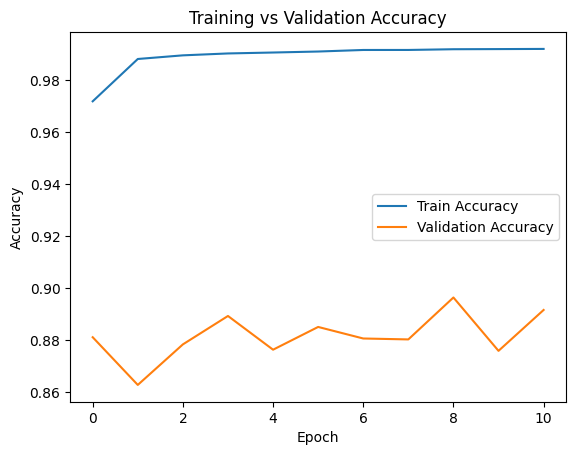

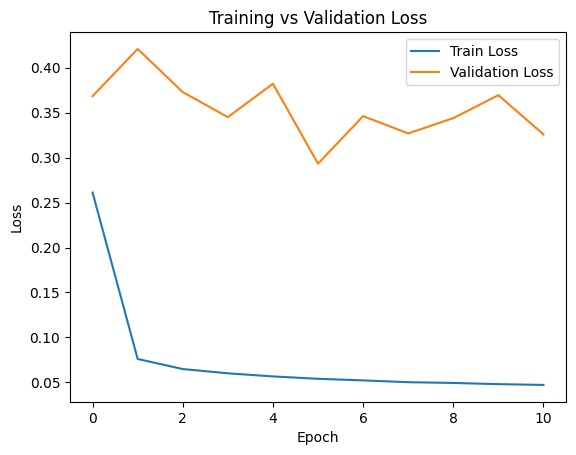

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

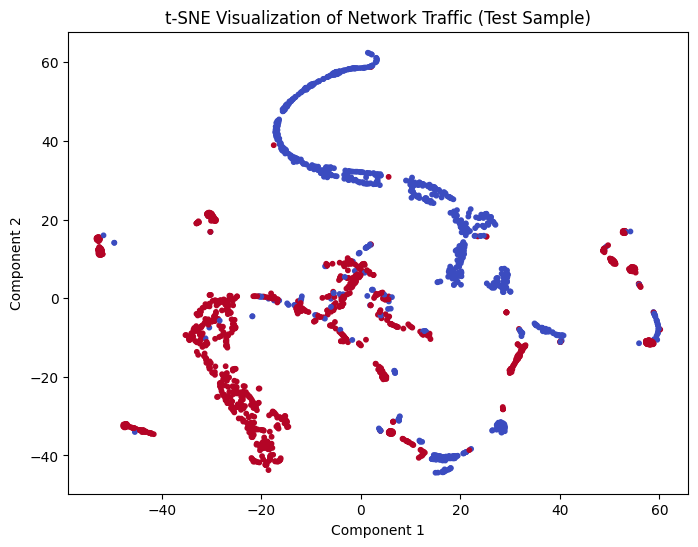

In [34]:
from sklearn.manifold import TSNE

X_sample = X_test[:2000]
y_sample = y_test[:2000]

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_sample)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap='coolwarm', s=10)
plt.title('t-SNE Visualization of Network Traffic (Test Sample)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()